
# Prediction of obesity level based on eating habits

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import skew
from scipy.stats import kurtosis



In [3]:
# import data and round numerical data by 2
obesity_raw = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
obesity = obesity_raw.copy()
obesity = obesity.round(2)
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
obesity.shape

(2111, 17)

In [7]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
obesity.select_dtypes('object')


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
# replacing each acronym by their meaning
obesity.columns =['Gender', 'Age', 'Height', 'Weight', 'Family history with overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'SMOKE', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity Level']

<!-- ddd -->

In [7]:
obesity.head()



,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,SMOKE,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
import dataframe_image as dfi
df_styled = obesity.head().style.background_gradient()
dfi.export(df_styled,"obesity_table.png")


<AxesSubplot:title={'center':'Distribution of Obesity Level'}, xlabel='Obesity Level', ylabel='count'>

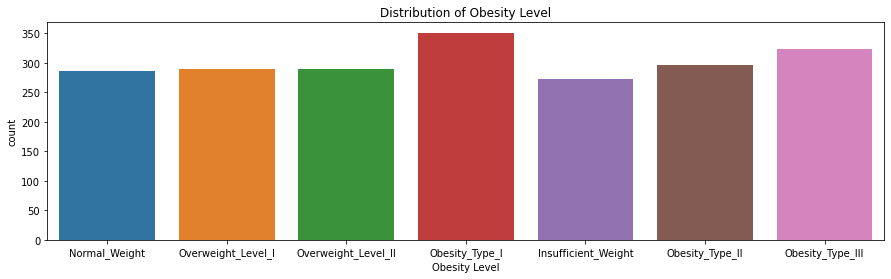

In [9]:
plt.figure(figsize=(15,4))
plt.title('Distribution of Obesity Level')
sns.countplot(data=obesity, x='Obesity Level')


## Visualization Gender, Height, Weight

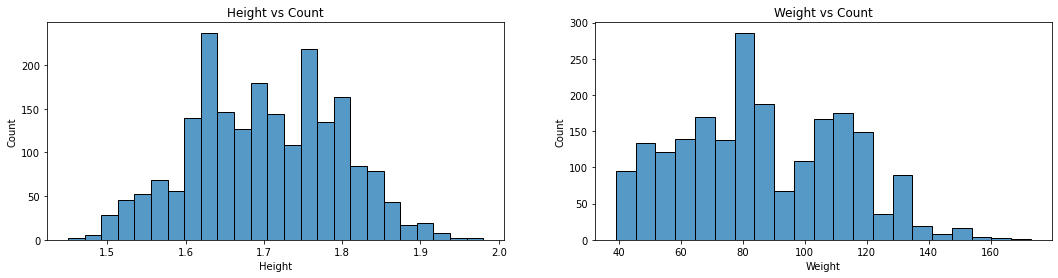

In [10]:
# create an histogram for Height and Weight
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(ax=axes[0], data=obesity, x='Height')
axes[0].set_title('Height vs Count')

sns.histplot(ax=axes[1], data=obesity, x='Weight')
axes[1].set_title('Weight vs Count')

# display the plot
plt.show()

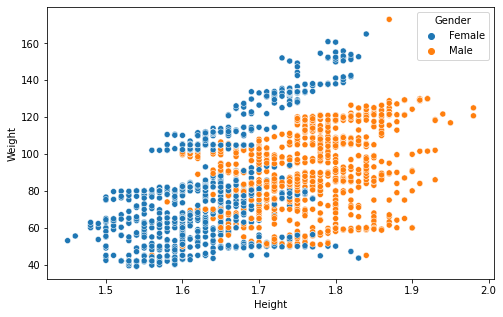

In [11]:
# create a scatter plot using hue
plt.figure(figsize=(8,5))
plt.title('')
sns.scatterplot(data=obesity,
           x="Height",
           y="Weight",
           hue="Gender")

# display the plot
plt.show()


We can see that the female population has the lowest weight compare to the male population.

At the same time its population has the highest number of people with overweight. 

It shows as well that the male population in average is taller than their female counterparts. 




## Visualization Physical activity frequency, Time using technology devices, Gender

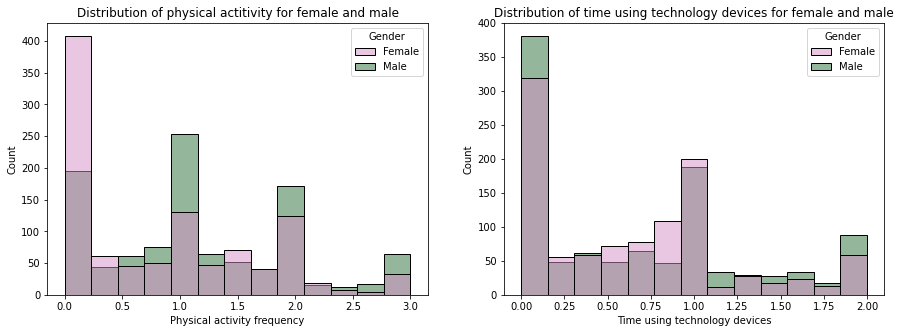

In [61]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# plt.title('Distribution of Physical actitivity and Time using Technology devices for Female and Male')
axes[0].set_title('Distribution of physical actitivity for female and male')
axes[1].set_title('Distribution of time using technology devices for female and male')
sns.histplot(ax=axes[0],data=obesity,x="Physical activity frequency", hue='Gender', palette='cubehelix_r')

sns.histplot(ax=axes[1],data=obesity, x='Time using technology devices', hue='Gender', palette='cubehelix_r')

# display the plot
plt.show()

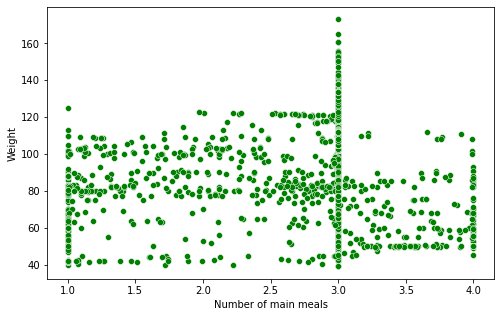

In [105]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=obesity,
               x="Number of main meals",
               y="Weight", color='green')

# display the plot
plt.show()


## Visualization Transportation used, Consumption of alcohol, Frequent consumption of high caloric food

<AxesSubplot:xlabel='Consumption of alcohol', ylabel='count'>

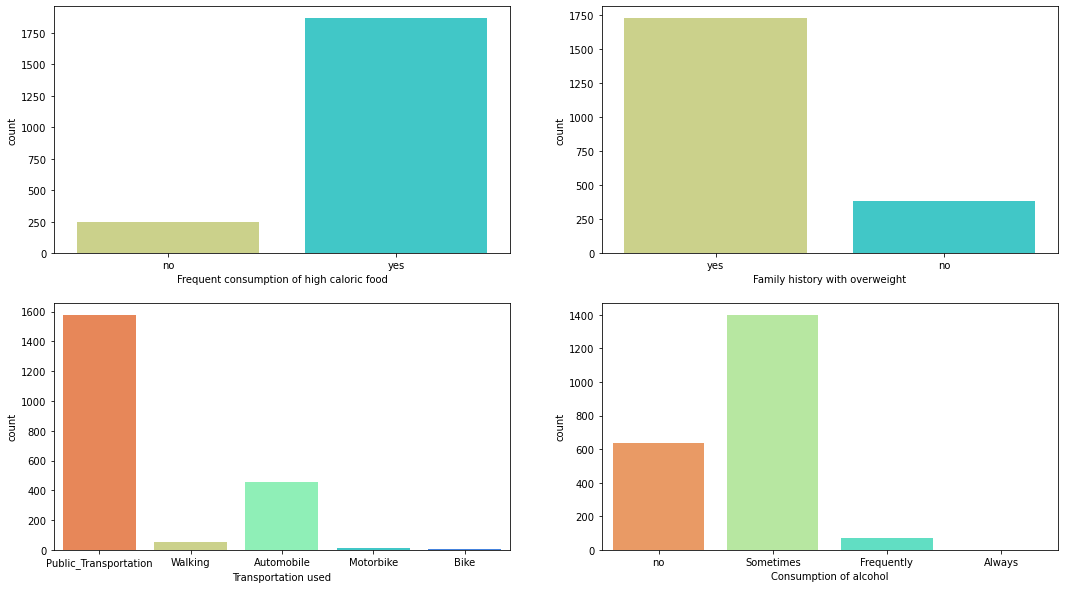

In [17]:
fig, axes= plt.subplots(2,2, figsize=(18,10))
sns.countplot(ax=axes[0][0], data=obesity,x= 'Frequent consumption of high caloric food', palette='rainbow_r')
sns.countplot(ax=axes[0][1], data=obesity, x='Family history with overweight', palette='rainbow_r')
sns.countplot(ax=axes[1][0], data=obesity, x='Transportation used', palette='rainbow_r')
sns.countplot(ax=axes[1][1], data=obesity, x='Consumption of alcohol', palette='rainbow_r')



## Visualisation Obesity level

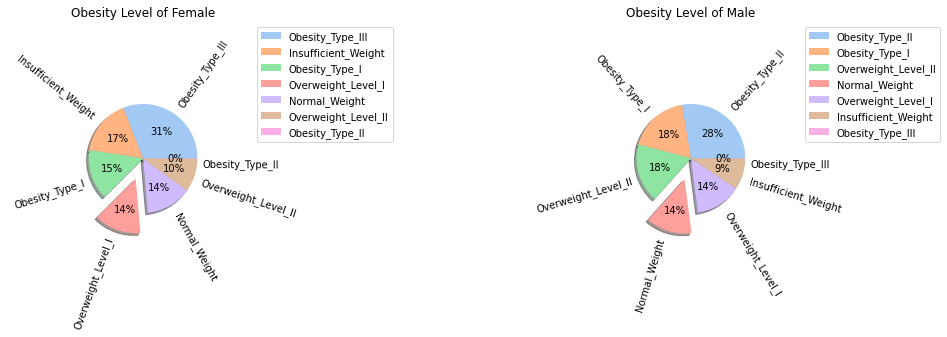

In [9]:
filter_female = obesity[obesity["Gender"]=="Female"]
filter_male = obesity[obesity["Gender"]=="Male"]

fig, axes = plt.subplots(1,2, figsize=(18,5))

colors = sns.color_palette('pastel')
explode = [0, 0, 0, 0.2, 0,0,0]


female_obese = filter_female['Obesity Level'].value_counts()
female_obese.plot(ax=axes[0],kind='pie', autopct='%1.0f%%',
                               colors=colors, ylabel='', radius=0.5, title='Obesity Level of Female',
                                explode=explode,shadow=True, rotatelabels='true')

male_obese = filter_male['Obesity Level'].value_counts()
male_obese.plot(ax=axes[1],kind='pie', autopct='%1.0f%%',
                               colors=colors, ylabel='', radius=0.5, title='Obesity Level of Male',
                                explode=explode,shadow=True, rotatelabels='true')

axes[0].legend(bbox_to_anchor=(0.9, 1), loc='upper left')
axes[1].legend(bbox_to_anchor=(0.9, 1), loc='upper left')

plt.show()


## Encoding

In [12]:
obese = obesity.copy()

In [13]:
obese.head()

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,SMOKE,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**ordinal encoding**

In [14]:
# using ordinal encoding to convert string to numerical value

obese['Level']= obese['Obesity Level'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
obese['Food consumption']=obese['Consumption of food between meals'].map({'no':0,'Sometimes':1,'Overweight_Level_I':2,'Frequently':3,'Always':4})
obese['Overweight history']=obese['Family history with overweight'].map({'no':0, 'yes':1})
obese['Caloric food']=obese['Frequent consumption of high caloric food'].map({'no':0, 'yes':1})

**count encoding**

In [15]:
# using count encoding
import category_encoders as ce
feature = ['Transportation used']
encoder = ce.CountEncoder(cols=feature)
transportation_enc= encoder.fit_transform(obese[feature])

In [16]:
transportation_enc.columns = ['Transportation']
transportation_enc.head()

,Transportation
0,1580
1,1580
2,1580
3,56
4,1580


In [17]:
obese_feat=pd.concat([obese, transportation_enc], axis=1)

**Calculate the correlation between the various features and the "Obesity Level" column.**

In [18]:
obese_feat_num = obese_feat.select_dtypes('number')
obese_feat_num.head()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices,Level,Food consumption,Overweight history,Caloric food,Transportation
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,1,0,1580
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,1,0,1580
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,1,0,1580
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,0,0,56
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,0,0,1580


In [19]:
obese_feat_num.corr()['Level'].sort_values()

Food consumption                         -0.385662
Physical activity frequency              -0.199840
Time using technology devices            -0.107943
Number of main meals                      0.026616
Transportation                            0.102054
Height                                    0.132625
Consumption of water daily                0.132979
Frequency of consumption of vegetables    0.227901
Caloric food                              0.247793
Age                                       0.282907
Overweight history                        0.505148
Weight                                    0.913250
Level                                     1.000000
Name: Level, dtype: float64

Text(0.5, 0.98, 'Cluster map of the dataset')

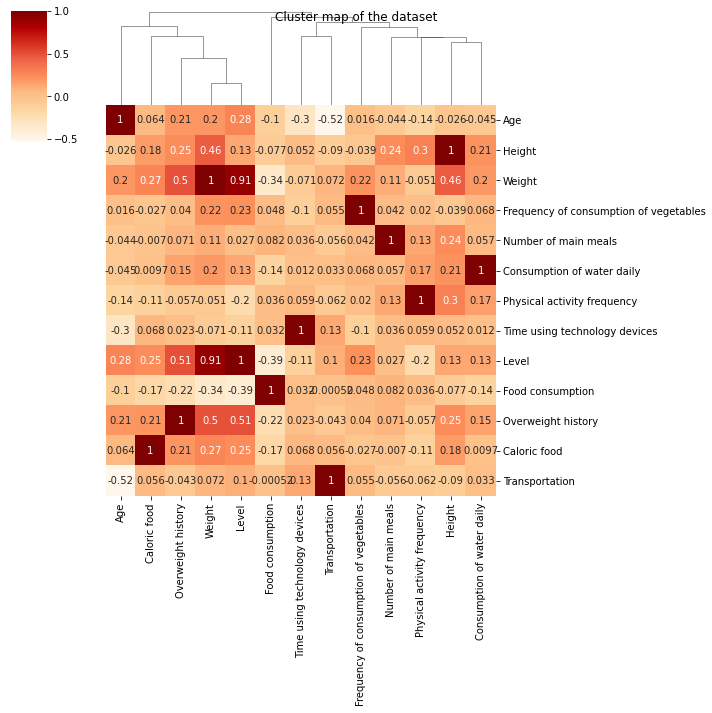

In [20]:
g=sns.clustermap(obese_feat_num.corr(),cmap='OrRd', annot=True, row_cluster=False)
g.fig.suptitle('Cluster map of the dataset') 


**The y axis is the distance and the closer the features are the  shorter going to be. Based on that we can say 
that Weight and Obesity level are quite similar**


## Clustering

**Feature Scaling**

In [21]:
obese_cluster = obese_feat_num.drop('Level', axis=1)

In [22]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
obese_scaled_clus = scal.fit_transform(obese_cluster)
obese_scaled_clus

array([[-0.52211756, -0.87437958, -0.8625576 , ...,  0.47229133,
        -2.75976929,  0.5741203 ],
       [-0.52211756, -1.9456595 , -1.16807652, ...,  0.47229133,
        -2.75976929,  0.5741203 ],
       [-0.20688274,  1.05392427, -0.36608937, ...,  0.47229133,
        -2.75976929,  0.5741203 ],
       ...,
       [-0.2825391 ,  0.51828431,  1.79889401, ...,  0.47229133,
         0.36234913,  0.5741203 ],
       [ 0.00747693,  0.41115632,  1.78590946, ...,  0.47229133,
         0.36234913,  0.5741203 ],
       [-0.10285525,  0.41115632,  1.79049224, ...,  0.47229133,
         0.36234913,  0.5741203 ]])

**Hierarchical Clustering**

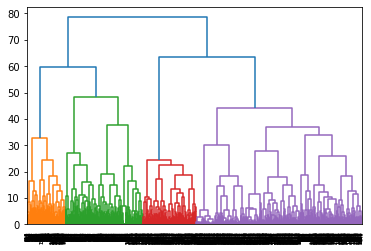

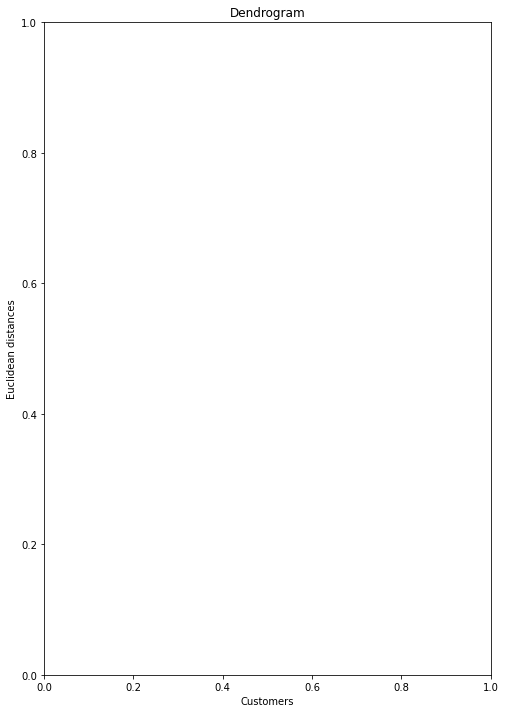

In [111]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(obese_scaled_clus, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Training the Hierarchical Clustering model on the dataset**


In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(obese_scaled_clus)

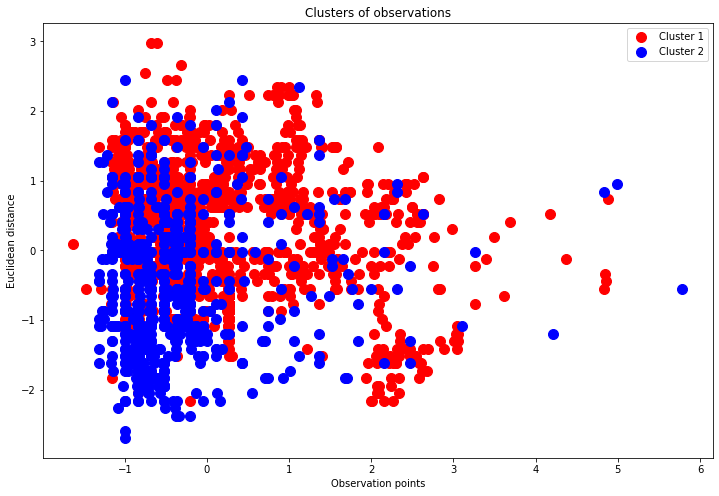

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(obese_scaled_clus[y_hc == 0, 0], obese_scaled_clus[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(obese_scaled_clus[y_hc == 1, 0], obese_scaled_clus[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.title('Clusters of observations')
plt.xlabel('Observation points')
plt.ylabel('Euclidean distance')
plt.legend()
plt.show()

**K-Means Clustering**

In [25]:
obese_feat_num.head()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices,Level,Food consumption,Overweight history,Caloric food,Transportation
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,1,0,1580
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,1,0,1580
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,1,0,1580
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,0,0,56
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,0,0,1580


In [26]:
X_cluster = obese_feat_num[['Weight', 'Age']]


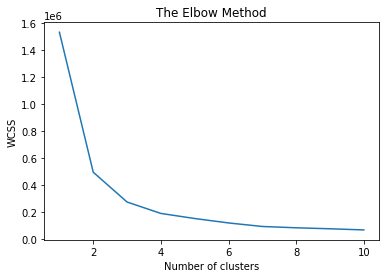

In [27]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_cluster)
    # sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training the K-means model on the dataset**

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_cluster)

**Visualisation of the clusters**

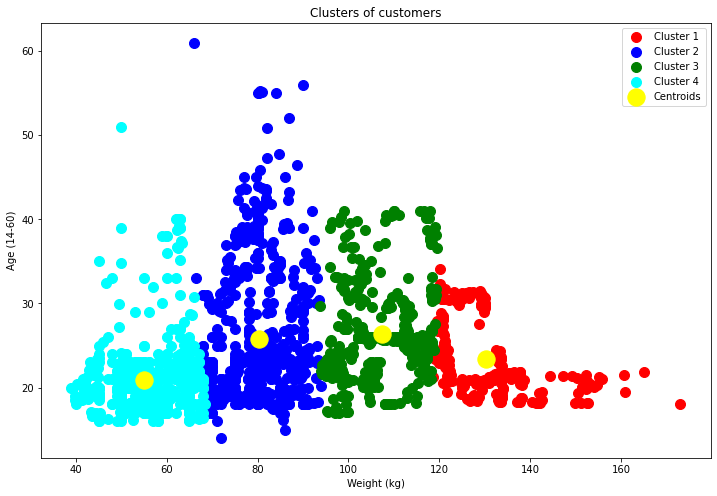

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X_cluster.iloc[y_kmeans == 0, 0], X_cluster.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_cluster.iloc[y_kmeans == 1, 0], X_cluster.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_cluster.iloc[y_kmeans == 2, 0], X_cluster.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_cluster.iloc[y_kmeans == 3, 0], X_cluster.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Weight (kg)')
plt.ylabel('Age (14-60)')
plt.legend()
plt.show()


## PCA

**feature scaling**

In [30]:
obese_pca = obese_feat_num.drop('Level', axis=1)

In [31]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
obese_scaled = sc.fit_transform(obese_pca)
obese_scaled

array([[-0.52211756, -0.87437958, -0.8625576 , ...,  0.47229133,
        -2.75976929,  0.5741203 ],
       [-0.52211756, -1.9456595 , -1.16807652, ...,  0.47229133,
        -2.75976929,  0.5741203 ],
       [-0.20688274,  1.05392427, -0.36608937, ...,  0.47229133,
        -2.75976929,  0.5741203 ],
       ...,
       [-0.2825391 ,  0.51828431,  1.79889401, ...,  0.47229133,
         0.36234913,  0.5741203 ],
       [ 0.00747693,  0.41115632,  1.78590946, ...,  0.47229133,
         0.36234913,  0.5741203 ],
       [-0.10285525,  0.41115632,  1.79049224, ...,  0.47229133,
         0.36234913,  0.5741203 ]])

**Perform PCA on the scaled data set with 2 components**

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
obese_pca = pca.fit_transform(obese_scaled)


In [33]:
obese_pca

array([[ 1.55445314, -0.11488914],
       [ 1.33850833, -0.66804441],
       [ 0.3279252 , -1.21185728],
       ...,
       [-1.71132857, -0.84678801],
       [-2.03345836, -0.80001946],
       [-1.99910364, -0.90735196]])

**How much variance is explained by 2 principal components**

In [34]:
np.sum(pca.explained_variance_ratio_)

0.3352425281288124

**Create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset**

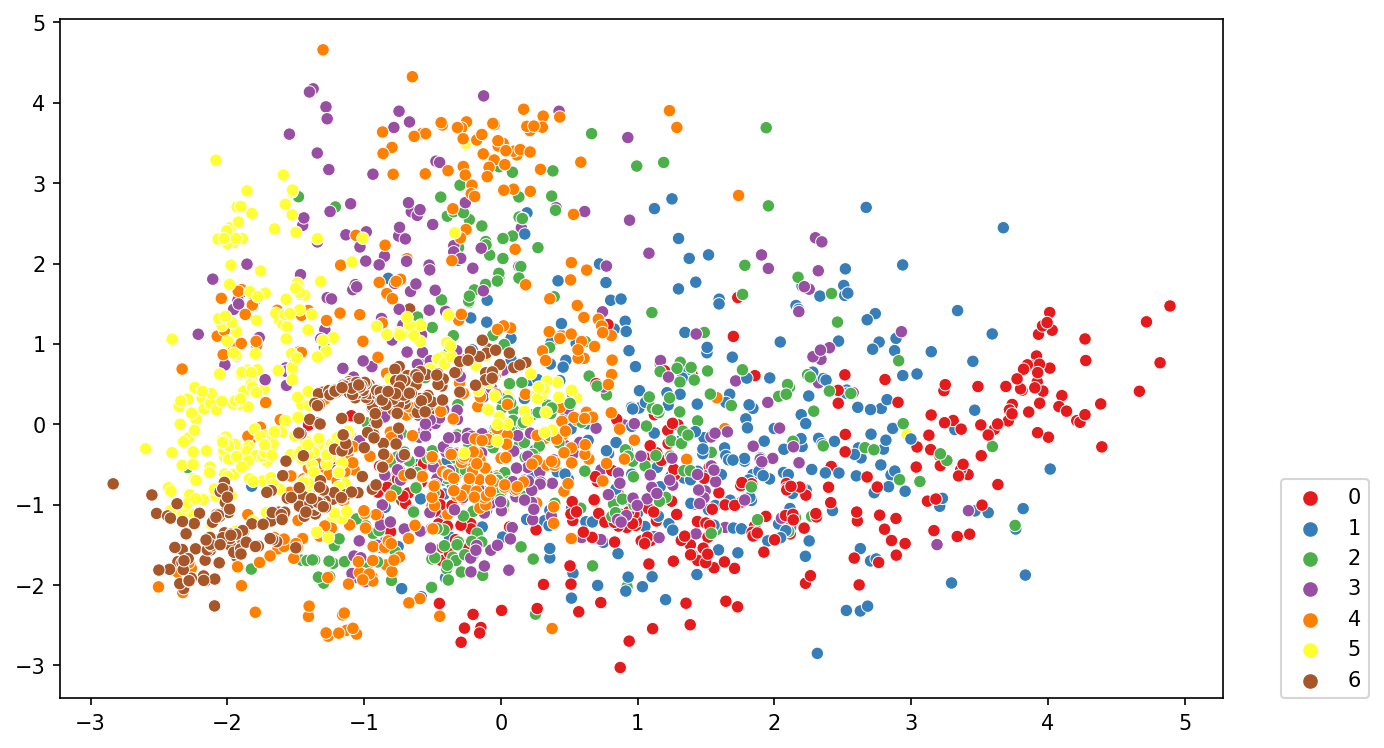

In [98]:
plt.figure(figsize=(10,6),dpi=150)
labels = obese_feat_num['Level'].values
sns.scatterplot(data = obese_pca, x=obese_pca[:,0], y=obese_pca[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

In [96]:
# We can say that number 6 and 5 which are respectively ObesityIII and ObesityII, are the most distinct group so it will be easier for the
# machine learning models to recognize them in the future. 


## Correlation

** **

<AxesSubplot:>

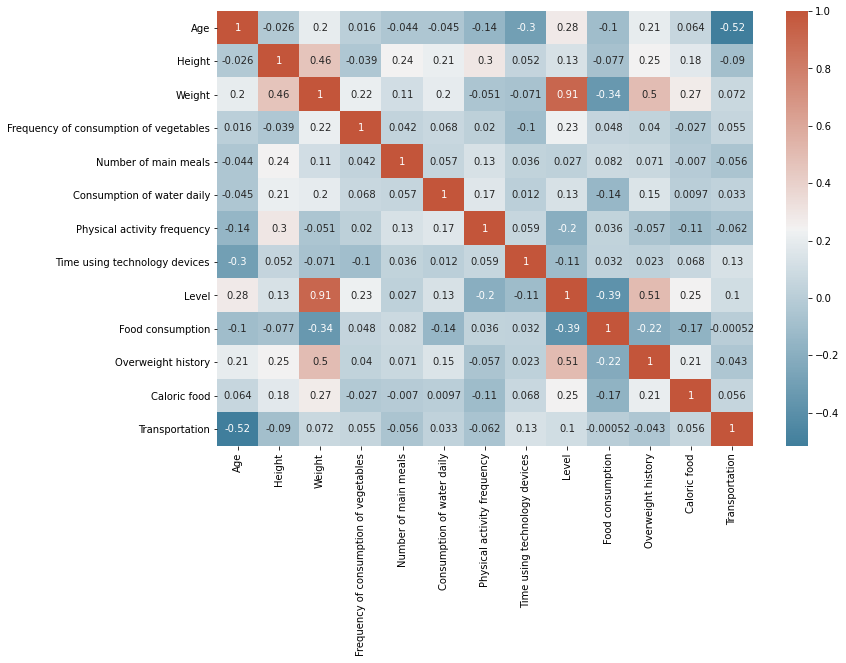

In [123]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(obese_feat_num.corr(), annot=True, cmap=cmap)

In [ ]:
# Variables such as Obesity level and Weight, Obesity Leven and Overweight history are having strong positive correlation.
# Meawhile variables such as Age and Transportation are having strong negative correlation.
# There are some variables that have no correlation and whose correlation value is near 0 like consumption of water daily 
# and caloric food.


## Joint probability

In [35]:
obese_feat_num.head()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices,Level,Food consumption,Overweight history,Caloric food,Transportation
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,1,0,1580
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,1,0,1580
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,1,0,1580
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,0,0,56
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,0,0,1580


**Food consumption and Overweight history**

In [36]:
# joint PMF table 
crosstab_ptable = pd.crosstab(obese_feat_num["Food consumption"], obese_feat_num["Overweight history"], normalize=True)

In [37]:
crosstab_ptable

Overweight history,0,1
Food consumption,,
0,0.015632,0.008527
1,0.103742,0.732354
3,0.054003,0.060635
4,0.009000,0.016106


In [38]:
# joint PMF  and its associated marginal PMFs
pd.crosstab(obese_feat_num["Food consumption"], obese_feat_num["Overweight history"], margins=True, margins_name='Total', normalize=True)

Overweight history,0,1,Total
Food consumption,,,
0,0.015632,0.008527,0.024159
1,0.103742,0.732354,0.836097
3,0.054003,0.060635,0.114638
4,0.009000,0.016106,0.025107
Total,0.182378,0.817622,1.000000


Let $X$ and $Y$ be Food consumption and Overweight history respectively with joint PMF $p_{X,Y}$ and marginal
PMFs $p_X$ and $p_Y$ , respectively. Then $X$ and $Y$ are independent, if and only if
$p_{X,Y}(x, y) = p_X(x)p_Y(y)$ for all $(x, y) ∈ X × Y$

$p_X(0) = 0.024159 , p_Y(0) = 0.182378 \\
p_{X,Y}(0, 0) = 0.015632 \neq 0.00440607 =p_X(0)p_Y(0) \\$
Therefore, variables $X$ and $Y$ are not independent. 

**Food consumption and Transportation**

In [39]:
# joint PMF table 
pd.crosstab(obese_feat_num["Food consumption"], obese_feat_num["Transportation"], normalize=True)

Transportation,7,11,56,457,1580
Food consumption,,,,,
0,0.000000,0.000000,0.000947,0.001421,0.021791
1,0.002842,0.002369,0.017527,0.197537,0.615822
3,0.000000,0.002369,0.005211,0.011843,0.095216
4,0.000474,0.000474,0.002842,0.005685,0.015632


In [40]:
# joint PMF  and its associated marginal PMFs
pd.crosstab(obese_feat_num["Food consumption"], obese_feat_num["Transportation"], margins=True, margins_name='Total', normalize=True)

Transportation,7,11,56,457,1580,Total
Food consumption,,,,,,
0,0.000000,0.000000,0.000947,0.001421,0.021791,0.024159
1,0.002842,0.002369,0.017527,0.197537,0.615822,0.836097
3,0.000000,0.002369,0.005211,0.011843,0.095216,0.114638
4,0.000474,0.000474,0.002842,0.005685,0.015632,0.025107
Total,0.003316,0.005211,0.026528,0.216485,0.748460,1.000000


Let $X$ and $Y$ be Food consumption and Transportation respectively with joint PMF $p_{X,Y}$ and marginal
PMFs $p_X$ and $p_Y$ , respectively. Then $X$ and $Y$ are independent, if and only if
$p_{X,Y}(x, y) = p_X(x)p_Y(y)$ for all $(x, y) ∈ X × Y$

$p_X(1) = 0.836097 , p_Y(7) = 0.003316 \\
p_{X,Y}(1, 7) = 0.002842 \neq 0.002772 =p_X(1)p_Y(7) \\$
Even though both result are different, if you rounded to 4 decimal places they will be equal, in that sense
we could say variables $X$ and $Y$ are independent. 


## Linear dependencies between variables 

**Splitting data set into training and test set**

In [56]:
# sns.lmplot(x="Weight", y="Height", data=obese_feat_num, order=1)
# plt.ylabel('Target')
# plt.xlabel('Independent variable')
X_lin = obese_feat_num[['Food consumption']].values
y_lin = obese_feat_num['Overweight history'].values

from sklearn.model_selection import train_test_split
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size = 1/3, random_state = 0)

In [57]:
# Training the model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_lin_train, (y_lin_train))


LinearRegression()

In [58]:
# Predicting test results 
y_pred_lin = regressor.predict(X_lin_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred_lin.reshape(len(y_pred_lin),1), y_lin_test.reshape(len(y_lin_test),1)),1))

[[0.84 1.  ]
 [0.65 1.  ]
 [0.84 0.  ]
 ...
 [0.84 1.  ]
 [0.65 0.  ]
 [0.84 1.  ]]


**Visualisation of the training set**

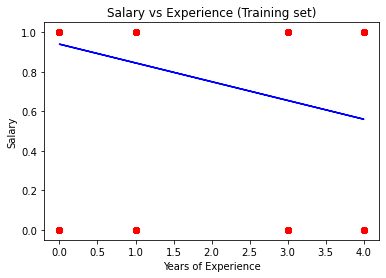

In [59]:
plt.scatter(X_lin_train, y_lin_train, color = 'red')
plt.plot(X_lin_train, regressor.predict(X_lin_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Seperate the data into features (X) and the target variable (y)**

In [47]:
# select only the independant variable (Level is not choosed)
X=obese_feat[['Age',
 'Weight',
 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices',
 'Food consumption',
 'Overweight history',
 'Caloric food',
 'Transportation']]

y=obese_feat['Obesity Level']

**Splitting the dataset into the Training set and Test set**

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)



In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)
print(scaled_X_train)
print(scaled_X_test)


[[ 1.1805022  -1.13986629  1.09788501 ...  0.48256196  0.36042643
  -1.58096328]
 [-0.95633611 -0.66271141 -0.35743613 ...  0.48256196  0.36042643
   0.58072135]
 [-0.21713914 -1.101355   -0.76791132 ... -2.07227276 -2.77449134
   0.58072135]
 ...
 [-0.99360655  0.87042301 -0.76791132 ...  0.48256196  0.36042643
   0.58072135]
 [-0.5277261  -1.71753563  1.09788501 ... -2.07227276  0.36042643
   0.58072135]
 [-0.21713914  0.31547534 -0.76791132 ...  0.48256196  0.36042643
   0.58072135]]
[[-0.52617317  1.74578462  1.09788501 ...  0.48256196  0.36042643
   0.58072135]
 [-0.21869207  0.18338161 -0.84254318 ...  0.48256196  0.36042643
   0.58072135]
 [ 0.24874131  0.97170771  1.09788501 ...  0.48256196  0.36042643
   0.58072135]
 ...
 [ 0.68822186 -0.33112921  1.09788501 ...  0.48256196  0.36042643
  -1.58096328]
 [ 0.09344783  1.32485623  1.09788501 ...  0.48256196 -2.77449134
  -2.35285602]
 [ 0.37918784  0.6162485   0.50083018 ...  0.48256196  0.36042643
   0.58072135]]


## Using Support Vector Machine

In [83]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(scaled_X_train, y_train)

SVC(random_state=10)

In [84]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = classifier.predict(scaled_X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[66  1  0  0  0  0  0]
 [ 5 48  0  0  0  7  8]
 [ 0  4 66  1  0  4  2]
 [ 0  0  0 69  2  0  0]
 [ 0  0  0  1 90  0  0]
 [ 3 15  5  0  0 52 13]
 [ 0  3 15  1  0  2 45]]


0.8257575757575758

In [37]:
cm_df = pd.DataFrame(cm,
                     index   = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'], 
                     columns = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']) 


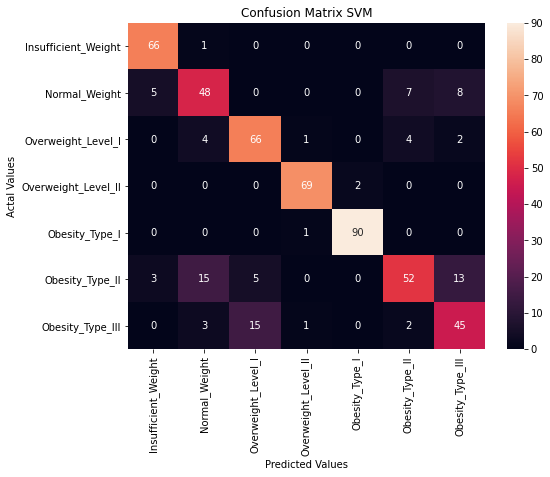

In [38]:
# plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix SVM')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Text(0.5, 1.0, 'Classification report SVM')

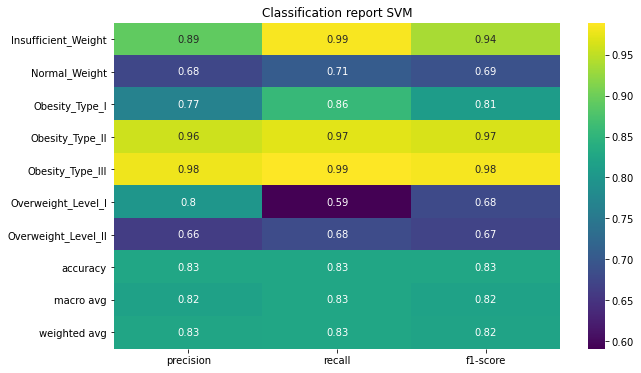

In [96]:
plt.figure(figsize=(10,6))
svm_df = (pd.DataFrame(classification_report(y_test,y_pred, digits=2,
                                        output_dict=True)).T).iloc[:,:-1]
sns.heatmap(svm_df, annot=True, cmap='viridis')
plt.title('Classification report SVM')


**Run a grid search for the best parameters**

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto'], 'kernel': ['rbf','linear']}
grid = GridSearchCV(classifier,param_grid)

In [29]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(random_state=10),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']})

In [30]:
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 78.33 %
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}



## Random Forest Classification

In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)


# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(scaled_X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
rf_y_pred = rf_classifier.predict(scaled_X_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
print(rf_cm)
print(accuracy_score(y_test, rf_y_pred))

rf_report=classification_report(y_test,rf_y_pred)

rf_df = (pd.DataFrame(classification_report(y_test,rf_y_pred, digits=2,
                                        output_dict=True)).T).iloc[:,:-1]


[[65  2  0  0  0  0  0]
 [ 4 57  0  0  0  5  2]
 [ 0  2 72  0  1  0  2]
 [ 0  0  0 70  1  0  0]
 [ 0  1  0  0 90  0  0]
 [ 0 10  4  0  0 72  2]
 [ 0  5  6  0  0  1 54]]
0.9090909090909091


Text(0.5, 1.0, 'Classification report Random Forest Classification')

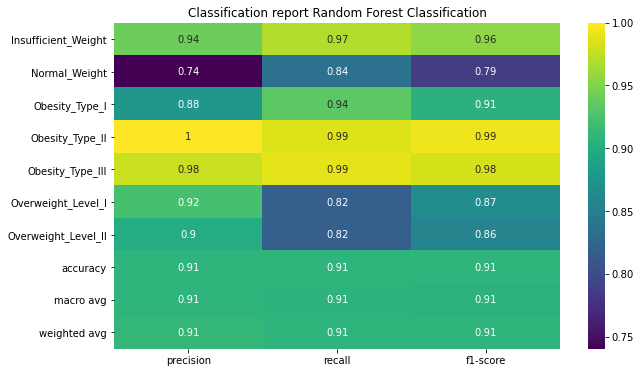

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(rf_df, annot=True, cmap='viridis')
plt.title('Classification report Random Forest Classification')




## Naive Bayes

In [39]:
# Feature Scaling
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(scaled_X_train, y_train)

# Making the Confusion Matrix
nb_y_pred = nb_classifier.predict(scaled_X_test)
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
accuracy_score(y_test, nb_y_pred)

[[53 13  0  0  1  0  0]
 [19 32  6  0  4  7  0]
 [ 0  2 56 10  5  1  3]
 [ 0  0  6 63  1  0  1]
 [ 0  0  1  0 90  0  0]
 [ 4  8 44  0  1 26  5]
 [ 0  8 38  0  1  1 18]]


0.6401515151515151

In [31]:
# check for missing value
obesity.isna().sum()

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family history with overweight               0
Frequent consumption of high caloric food    0
 Frequency of consumption of vegetables      0
Number of main meals                         0
Consumption of food between meals            0
SMOKE                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity Level                                0
dtype: int64

In [4]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312563,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657887
std,6.345980,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608956
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.950000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,22.780000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.630000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
obesity.min(axis=0)

Gender                                         Female
Age                                              14.0
Height                                           1.45
Weight                                           39.0
family_history_with_overweight                     no
FAVC                                               no
FCVC                                              1.0
NCP                                               1.0
CAEC                                           Always
SMOKE                                              no
CH2O                                              1.0
SCC                                                no
FAF                                               0.0
TUE                                               0.0
CALC                                           Always
MTRANS                                     Automobile
NObeyesdad                        Insufficient_Weight
dtype: object

In [5]:
obesity.max(axis=0)

Gender                                           Male
Age                                              61.0
Height                                           1.98
Weight                                          173.0
family_history_with_overweight                    yes
FAVC                                              yes
FCVC                                              3.0
NCP                                               4.0
CAEC                                               no
SMOKE                                             yes
CH2O                                              3.0
SCC                                               yes
FAF                                               3.0
TUE                                               2.0
CALC                                               no
MTRANS                                        Walking
NObeyesdad                        Overweight_Level_II
dtype: object

In [6]:
# def draw_value(df,c):
#     mean = np.mean(df.iloc[:,c:c+1])
#     std  = np.std(df.iloc[:,c:c+1])
#     skewness= skew(df.iloc[:,c:c+1])
# #     kurtosis= kurtosis(df.iloc[:,c:c+1])
#     data = [{'mean': mean, 'std': std, 'skewness':skewness}] 
#     new_data=pd.DataFrame(data)
#     return new_data




(0.0, 5.0)

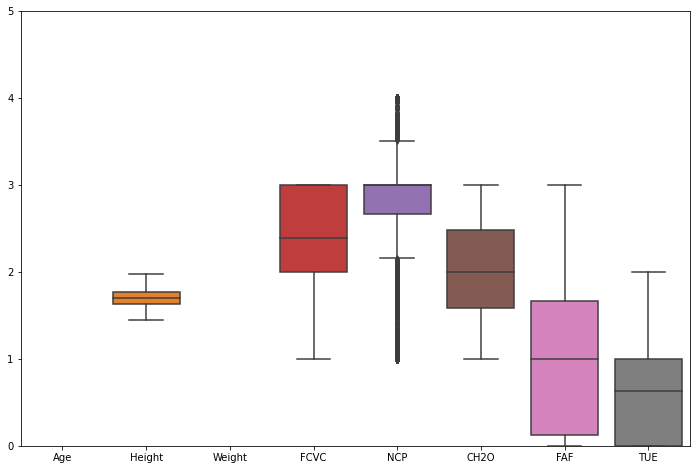

In [6]:
# check for outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=obesity)
plt.ylim(0,5)

<Figure size 1080x1080 with 0 Axes>

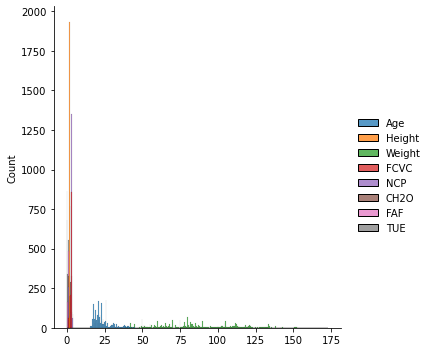

In [11]:
#  
plt.figure(figsize=(15,15))
sns.displot(data=obesity)

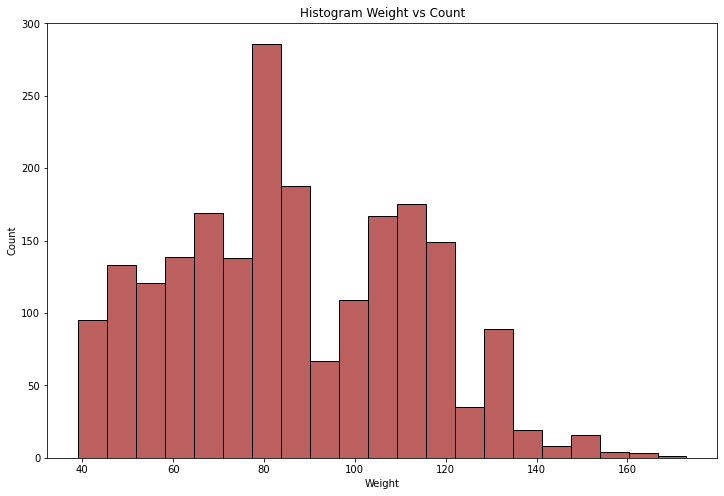

In [6]:
weight=obesity['Weight']
plt.figure(figsize=(12,8))
plt.title('Histogram Weight vs Count')
n=sns.histplot(data=weight,  color='brown')

<AxesSubplot:title={'center':'Weight VS PMF'}, xlabel='Weight', ylabel='PMF'>

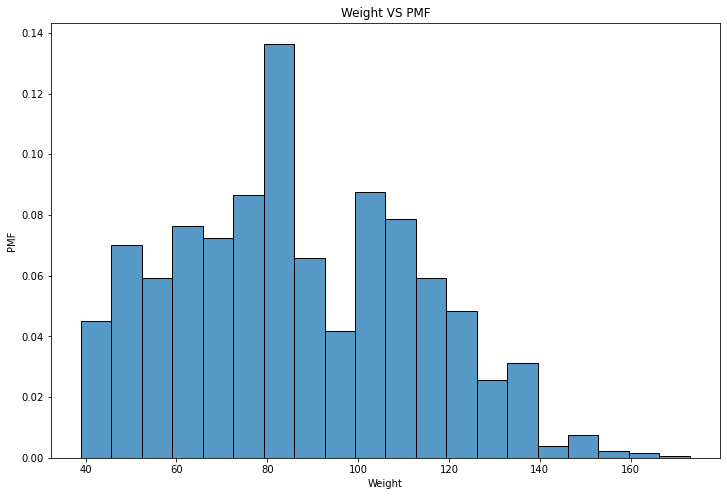

In [7]:
plt.figure(figsize=(12,8))
plt.ylabel('PMF')
plt.title('Weight VS PMF')
sns.histplot(data=weight, stat='probability', bins=20)


In [9]:
weight=obesity['Weight']
skewness= skew(weight)
std= np.std(weight)
mean = np.mean(weight)
kurt= kurtosis(weight)

data = [{'mean': mean, 'std': std, 'skewness':skewness,'kurtosis':kurt}] 
df_weight=pd.DataFrame(data)
df_weight

,mean,std,skewness,kurtosis
0,86.586058,26.184968,0.255229,-0.701082


<AxesSubplot:title={'center':'Histogram Height vs Count'}, xlabel='Height', ylabel='Count'>

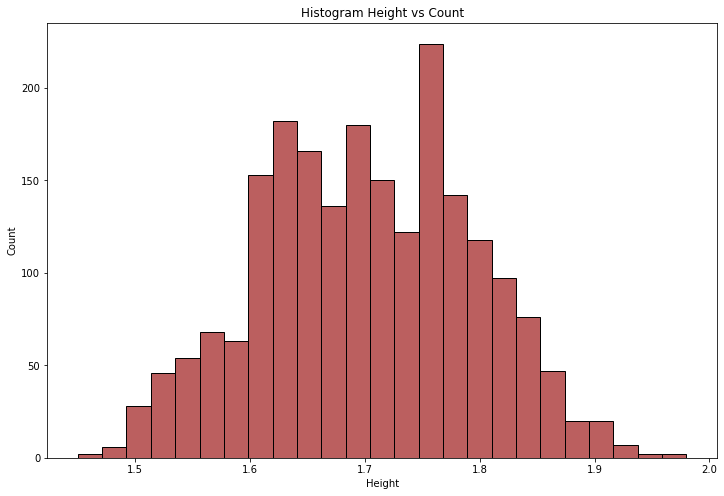

In [10]:
height=obesity['Height']
plt.figure(figsize=(12,8))
plt.title('Histogram Height vs Count')
sns.histplot(data=height, color='brown')

<AxesSubplot:title={'center':'Height vs PMF'}, xlabel='Height', ylabel='PMF'>

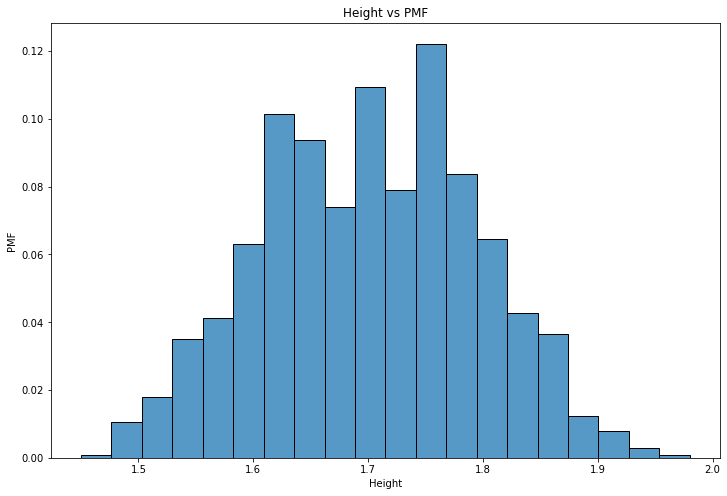

In [11]:
plt.figure(figsize=(12,8))
plt.ylabel('PMF')
plt.title('Height vs PMF')
sns.histplot(data=height, stat='probability', bins=20)

In [12]:
skew_h= skew(height)
std_h= np.std(height)
mean_h = np.mean(height)
kurt_h= kurtosis(height)

data_h = [{'mean': mean_h, 'std': std_h, 'skewness':skew_h,'kurtosis':kurt_h}] 
df_height=pd.DataFrame(data_h)
df_height

,mean,std,skewness,kurtosis
0,1.701677,0.093283,-0.012846,-0.564457


In [13]:
from fitter import get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powe

,sumsquare_error,aic,bic,kl_div
beta,0.003342,1099.748738,-28164.254146,inf
dweibull,0.003429,1098.247670,-28117.800986,inf
gamma,0.003536,1078.641844,-28052.423054,inf
lognorm,0.003547,1085.046687,-28045.880231,inf
norm,0.003594,1114.007615,-28025.991374,inf


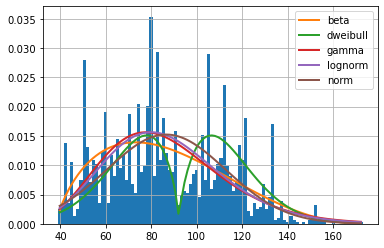

In [14]:
# plot distribution for weight
weight_=obesity['Weight'].values
f_w = Fitter(weight_,
           distributions=['gamma',
                          'dweibull',
                          'lognorm',
                          'powerlaw',
                          "beta",
                          "burr",
                          "norm"])

f_w.fit()
f_w.summary()

In [15]:
# show optimized parameters for the beta distribution of weight

tup_weight=f_w.fitted_param["beta"]
# shape parameters
shape_w=[tup_weight[0], tup_weight[1]] 
# location parameter
loc_w=tup_weight[2] 
# scale parameter
scale_w=tup_weight[3]

param_w = [{'shape': shape_w, 'loc': loc_w, 'scale':scale_w}] 
df_param_w=pd.DataFrame(param_w)
df_param_w

,shape,loc,scale
0,"[1.7872367644011353, 3.2961567194502037]",38.087911,136.972418


,sumsquare_error,aic,bic,kl_div
beta,131.097916,6.739436,-5835.791395,inf
norm,136.610477,-15.613714,-5764.150942,inf
gamma,136.683050,-13.915250,-5755.374873,inf
lognorm,136.973585,-14.391292,-5750.892469,inf
dweibull,140.230130,-9.530033,-5701.290798,inf


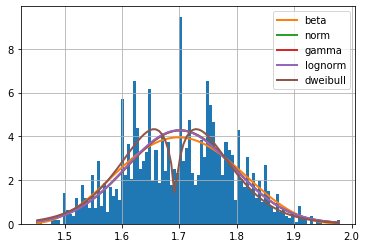

In [16]:
# plot distribution for Height 
height_=obesity['Height'].values
f_h= Fitter(height_,
           distributions=['gamma',
                          'dweibull',
                          'lognorm',
                          'powerlaw',
                          "beta",
                          "burr",
                          "norm"])

f_h.fit()
f_h.summary()

In [17]:
# show optimized parameters for the beta distribution of Height
tup_height=f_h.fitted_param["beta"]
# shape parameter
shape=[tup_height[0], tup_height[1]]
# loaction parameter
loc=tup_height[2]
# scale parameter
scale=tup_height[3]

param_h = [{'shape': shape, 'loc': loc, 'scale':scale}] 
df_param_h=pd.DataFrame(param_h)
df_param_h

,shape,loc,scale
0,"[4.382038260880084, 4.698686212480975]",1.415872,0.591951


## Correlation, Scatter Plot

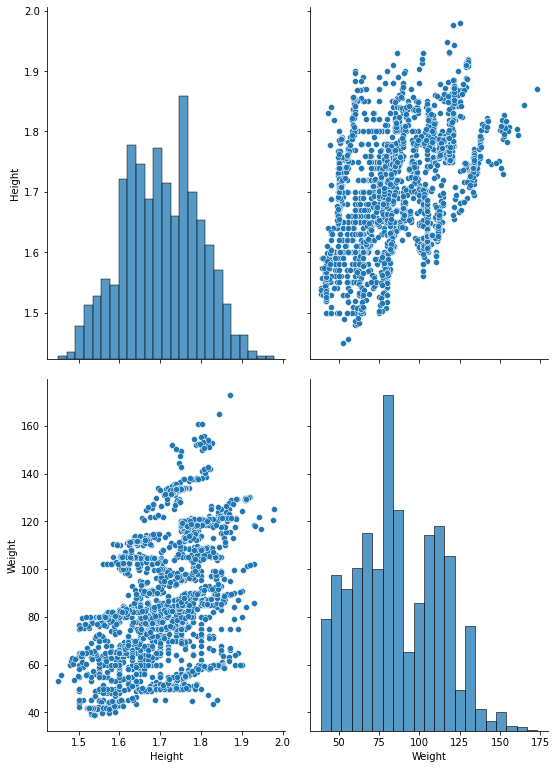

In [18]:
# Scatter plot matrix of Height and Weight 
ax=sns.pairplot(obesity.iloc[:,2:4])
ax.fig.set_figwidth(8.27)
ax.fig.set_figheight(11.7)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

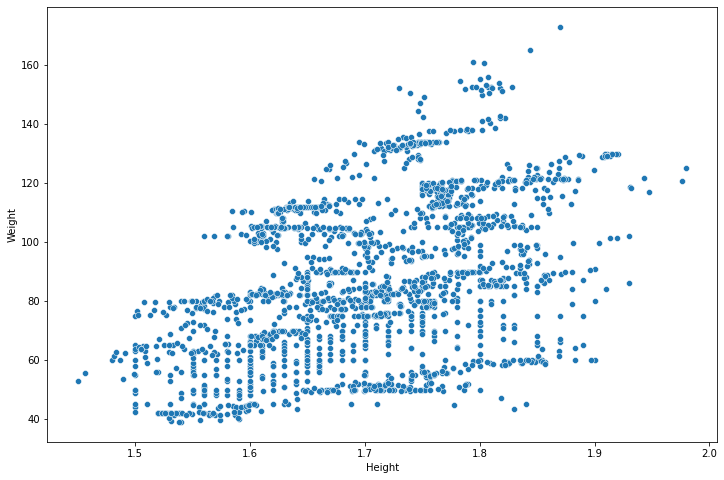

In [19]:
# Find the scatter plot of Height and Weight 
plt.figure(figsize=(12,8))
sns.scatterplot(data=obesity, x="Height", y="Weight")


In [20]:
# correlation matrix 
obesity.iloc[:,2:4].corr()

,Height,Weight
Height,1.000000,0.463136
Weight,0.463136,1.000000


##### person correlation coefficient is 0.463136 which is moderate positive correlation. Based on the result we can say that Height and Weight are correlated

In [21]:
probabilities = weight.value_counts(normalize=True) 
probabilities.values
# sns.barplot(data= weight, probabilities.index, probabilities.values, color='grey')

array([0.02794884, 0.02036949, 0.01989578, ..., 0.00047371, 0.00047371,
       0.00047371])

## Conditional pmf, Joint pmf

In [128]:
# get value of 2 numerical features Height and Weight in a new dataframe
extract = obesity.iloc[:,2:4]

In [129]:
# create 2 new features with the corresponding pmf as values  
extract['frequency_weight'] = obesity.Weight.map(obesity.Weight.value_counts())/2111
extract['frequency_height'] = obesity.Height.map(obesity.Height.value_counts())/2111


In [130]:
# create new feature joint_pmf showing the joint pmf
extract['joint_pmf'] = extract.frequency_height * extract.frequency_weight
extract

,Height,Weight,frequency_weight,frequency_height,joint_pmf
0,1.62,64.00,0.004737,0.045476,0.000215
1,1.52,56.00,0.007106,0.009000,0.000064
2,1.80,77.00,0.001895,0.027949,0.000053
3,1.80,87.00,0.002842,0.027949,0.000079
4,1.78,89.80,0.000947,0.030317,0.000029
...,...,...,...,...,...
2106,1.71,131.41,0.000474,0.032212,0.000015
2107,1.75,133.74,0.000947,0.057793,0.000055
2108,1.75,133.69,0.000474,0.057793,0.000027
2109,1.74,133.35,0.000474,0.031265,0.000015


In [139]:
extract[(extract['Height'] == 1.53) & (extract['Weight']==39.37 )]

,Height,Weight,frequency_weight,frequency_height,joint_pmf
589,1.53,39.37,0.000474,0.01279,0.000006


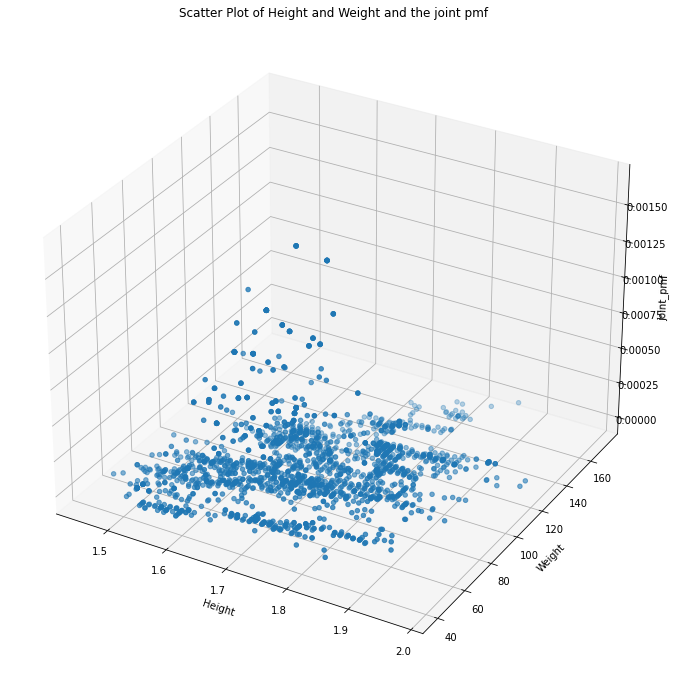

In [131]:
# Plot in 3d the 2 numerical featues and the joint pmf 
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(extract.Height, extract.Weight, extract.joint_pmf)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('joint_pmf')
plt.title("Scatter Plot of Height and Weight and the joint pmf")

plt.show()

In [283]:
# convert panda series to numpy array
x = extract['Height'].to_numpy()
y = extract['Weight'].to_numpy()
vec = np.stack((x, y), axis=1)

# function that get mu and sigma of the 2 features
def get_parameters(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig

print('Height :', x, '\n')
print('Weight :',y )


Height : [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836] 

Weight : [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]


In [289]:
# calculate mean and standard deviation of the 2 features
mu, sigma = get_parameters(vec)
print(mu, '\n')
print(sigma)

[ 1.70167735 86.58605813] 

[ 0.09328272 26.18496751]


In [286]:
# function that calculate the pdf 
def pdf_dist(X,mu,sigma):
    m = len(mu)
    sigma2 = np.diag(sigma)
    X = X-mu.T
    p = 1/((2*np.pi)**(m/2)*np.linalg.det(sigma2)**(0.5))*np.exp(-0.5*np.sum(X.dot(np.linalg.pinv(sigma2))*X,axis=1))

    return p

In [287]:
p = pdf_dist(vec, mu, sigma)
print(p)

[5.78025827e-06 1.48959383e-09 1.67240469e-02 ... 4.00406019e-20
 7.44539228e-20 5.94488133e-20]


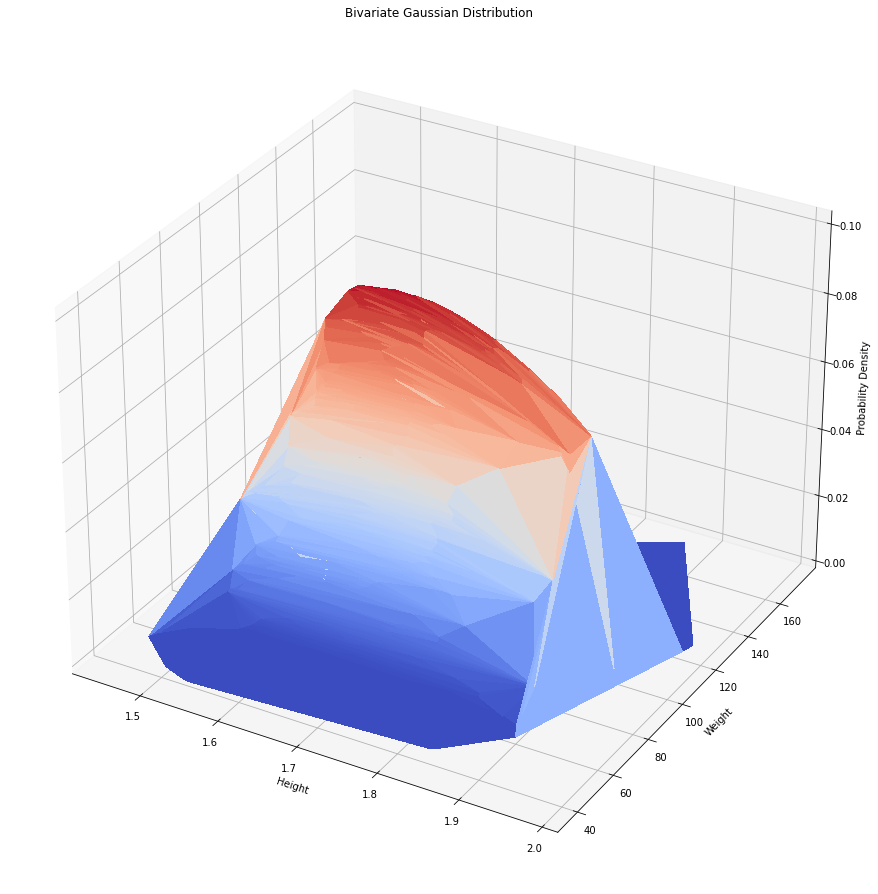

In [288]:
# 3d plot of the Gaussian Distribution 
from matplotlib import cm
from sys import argv
# Plot
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
surf = ax.plot_trisurf(x, y, p, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Probability Density')
plt.title("Bivariate Gaussian Distribution")
plt.show()